{'id': 42953, 'img': 'img/42953.png', 'label': 0, 'text': 'its their character not their color that matters'}


In [1]:
read_image(DATASET_PATH+'/' + nigg[text_index[4642]][0]['img'])

NameError: name 'read_image' is not defined

In [ ]:
img = read_image('/home/jafar/Desktop/Facebookprofilepic.jpg')
img

In [ ]:
eimg = get_vector(img)
indexer.query(eimg, k=30) 

In [ ]:
read_image(DATASET_PATH+'/' + nigg[text_index[6327]][0]['img'])

In [ ]:
images = np.load('./extracted_features.npy')
images.shape

In [2]:
import cv2
import random
import tensorflow as tf
from sklearn.neighbors import KDTree

import PIL
import numpy as np
import json

DATASET_PATH = '/home/jafar/Downloads/data'
    
FILE_JSON = DATASET_PATH + '/train.jsonl'

print('getting keras feature extractor')
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224,3),
                                               include_top=False,
                                               weights='imagenet')

print('loading database, it might take a while, it is 4.2GBs')
if not 'images' in locals():
    images = np.load('./extracted_features.npy')/255

print('Creating indexer')
indexer = KDTree(images)

def get_indexes():
    images_annotations = open(FILE_JSON).readlines()
    nigg = {}
    s = set()
    text_index = []
    for row in images_annotations:

        traindict = json.loads(row)
        if not traindict['id'] in nigg:
            nigg[traindict['id']] = []
        nigg[traindict['id']].append({'text':traindict['text'],'img':traindict['img']})
        text_index.append(traindict['id'])
    return text_index, nigg


text_index, nigg = get_indexes()

def predeploy():
    ## pre-deployment    
    
    images = np.zeros((8500,7,7,1280),np.float64)
    for cnt, k in enumerate(nigg.keys()):
        zbr = PIL.Image.open(DATASET_PATH+'/'+nigg[k][0]['img'])
        zbr.thumbnail((224,224))
        zbr = np.array(zbr)
        if zbr.shape[2] == 4:
            continue
        result = np.zeros((224,224,3))
        result[:zbr.shape[0],:zbr.shape[1]] = zbr
        result= result.reshape((1,224,224,3))

        images[cnt] = base_model.predict(result)
        if cnt % 50 == 0:
            print(cnt)
    images = images.reshape(8500,7*7*1280)
    # np.save('extracted_features', images)


def read_image(path):
    zbr= PIL.Image.open(path)
    zbr.thumbnail((224,224))
    return zbr

def image2np(img): # and resize
    zbr = np.array(img)
    result = np.zeros((224,224,3))
    result[:zbr.shape[0],:zbr.shape[1]] = zbr
    result= result.reshape((1,224,224,3))
    return result

def get_vector(img):
    try:
        extracted_features= base_model.predict(img)
        
    except:
        extracted_features= base_model.predict(image2np(img))
    return extracted_features.reshape(1, 7 * 7 * 1280)
    


getting keras feature extractor
loading database, it might take a while, it is 4.2GBs
Creating indexer


Processing image
i love everything and everybody! except for squirrels i hate squirrels
Shape (640, 639, 3)


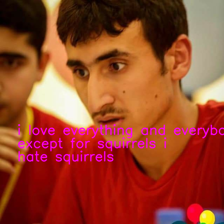

In [14]:

def process_image(path):

    K = 20
    
    
    # put text on image
    im = cv2.imread(path, 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    textr = ''
    imcopy = cv2.resize(im, dsize=(224,224), interpolation = cv2.INTER_AREA)
    img = get_vector(imcopy.reshape((1,224,224,3)))
    indexer.query(img,k=K)
    choice = random.choice(list(range(K)))
    text = nigg[text_index[choice]][0]['text']
    if len(im.shape) == 2:
        X, Y = im.shape
    else:
        X, Y, _ = im.shape[:3]
    
    print(text)
    print('Shape', im.shape)
    
    
    N = len(text.split(' '))
    lines = 0
    im = cv2.resize(im, dsize=(1000,1000), interpolation = cv2.INTER_AREA)
    X, Y = 1000, 1000
    for cnt,c in enumerate(text.split(' ')):
        

        textr+=c + ' '
        if (cnt % 4 == 0 and cnt != 0) or cnt == N-1:
            cv2.putText(im, textr, (77,X - 400 + lines * 59), font, 2, (255,0, 255), 4, cv2.LINE_AA)
            textr = ''
            lines += 1
    
    cv2.imwrite(f'./generated/{choice}.jpg', im)
    

    
    return f'./generated/{choice}.jpg'
print('Processing image')
read_image(process_image('./test/1.jpg'))
